# Telecom Churn Prediction

In [1]:
#Problem Statement :  To predict the customer churn in Telecom industry

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\user\Documents\Data Analytics Edu bridge\Telco-customerChurn.csv") 
data.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [4]:
data.shape

(7032, 21)

In [5]:
c_id=data["customerID"]
c_id

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7027    6840-RESVB
7028    2234-XADUH
7029    4801-JZAZL
7030    8361-LTMKD
7031    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

In [6]:
data=data.drop(["customerID"],axis=1)

In [ ]:
#The customerID column is useless to explain whether not the customer will churn. 
#Therefore, we drop this column from the data set.

# Missing value treatment


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#There is no any missing value in given dataset

# Coversion of data in Numeric form
Label Encoder method¶

In [10]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [13]:
data.shape

(7032, 20)

In [14]:
data.gender=le.fit_transform(data.gender)
data.Partner=le.fit_transform(data.Partner)
data.Dependents=le.fit_transform(data.Dependents)
data.PhoneService=le.fit_transform(data.PhoneService)
data.MultipleLines=le.fit_transform(data.MultipleLines)
data.InternetService=le.fit_transform(data.InternetService)
data.OnlineSecurity=le.fit_transform(data.OnlineSecurity)
data.OnlineBackup=le.fit_transform(data.OnlineBackup)
data.DeviceProtection=le.fit_transform(data.DeviceProtection)
data.TechSupport=le.fit_transform(data.TechSupport)
data.StreamingTV=le.fit_transform(data.StreamingTV)
data.StreamingMovies=le.fit_transform(data.StreamingMovies)
data.Contract=le.fit_transform(data.Contract)
data.PaperlessBilling=le.fit_transform(data.PaperlessBilling)
data.PaymentMethod=le.fit_transform(data.PaymentMethod)
data.Churn=le.fit_transform(data.Churn)

In [15]:
data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [16]:
data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [17]:
data.drop_duplicates(inplace=True)
data.shape

(7010, 20)

In [18]:
#Number of duplicated values in dataset:  23

# Exploratory Data Analysis

In [19]:
x=data.corr()
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001069,-0.000583,0.010912,0.006370,-0.007799,-0.006107,-0.003143,-0.015145,-0.012045,0.001250,-0.006916,-0.005662,-0.008958,0.000780,-0.011497,0.015889,-0.012361,0.000879,-0.008694
SeniorCitizen,-0.001069,1.000000,0.016030,-0.211479,0.014456,0.008724,0.145621,-0.031066,-0.127982,-0.013398,-0.021174,-0.151088,0.030946,0.047029,-0.142890,0.155922,-0.036921,0.219131,0.101642,0.151270
Partner,-0.000583,0.016030,1.000000,0.451254,0.379564,0.019420,0.140133,0.003292,0.150372,0.152434,0.165035,0.126178,0.135781,0.128968,0.292330,-0.014856,-0.153504,0.095277,0.317021,-0.148670
Dependents,0.010912,-0.211479,0.451254,1.000000,0.161288,-0.000408,-0.027064,0.046046,0.151016,0.089719,0.079203,0.132310,0.045470,0.021293,0.239279,-0.110973,-0.039886,-0.114641,0.062762,-0.162366
tenure,0.006370,0.014456,0.379564,0.161288,1.000000,0.009217,0.341092,-0.026302,0.327588,0.372391,0.372635,0.324995,0.289941,0.296141,0.675876,0.003709,-0.367462,0.244194,0.825293,-0.353339
PhoneService,-0.007799,0.008724,0.019420,-0.000408,0.009217,1.000000,-0.019519,0.387380,-0.013990,0.024374,0.005034,-0.017958,0.056847,0.043477,0.003872,0.017017,-0.006624,0.249625,0.114222,0.011072
MultipleLines,-0.006107,0.145621,0.140133,-0.027064,0.341092,-0.019519,1.000000,-0.106444,0.006767,0.116575,0.121931,0.010384,0.174570,0.180860,0.108741,0.164971,-0.173869,0.432571,0.451510,0.040181
InternetService,-0.003143,-0.031066,0.003292,0.046046,-0.026302,0.387380,-0.106444,1.000000,-0.029011,0.036332,0.045177,-0.026600,0.108283,0.098053,0.102317,-0.136588,0.081012,-0.319423,-0.173540,-0.047169
OnlineSecurity,-0.015145,-0.127982,0.150372,0.151016,0.327588,-0.013990,0.006767,-0.029011,1.000000,0.184027,0.174864,0.284102,0.043283,0.055206,0.374122,-0.157104,-0.096837,-0.053041,0.254466,-0.288246
OnlineBackup,-0.012045,-0.013398,0.152434,0.089719,0.372391,0.024374,0.116575,0.036332,0.184027,1.000000,0.186649,0.194673,0.145971,0.135948,0.280295,-0.011890,-0.125415,0.120560,0.375430,-0.193979


# DATA VISUALIZATION

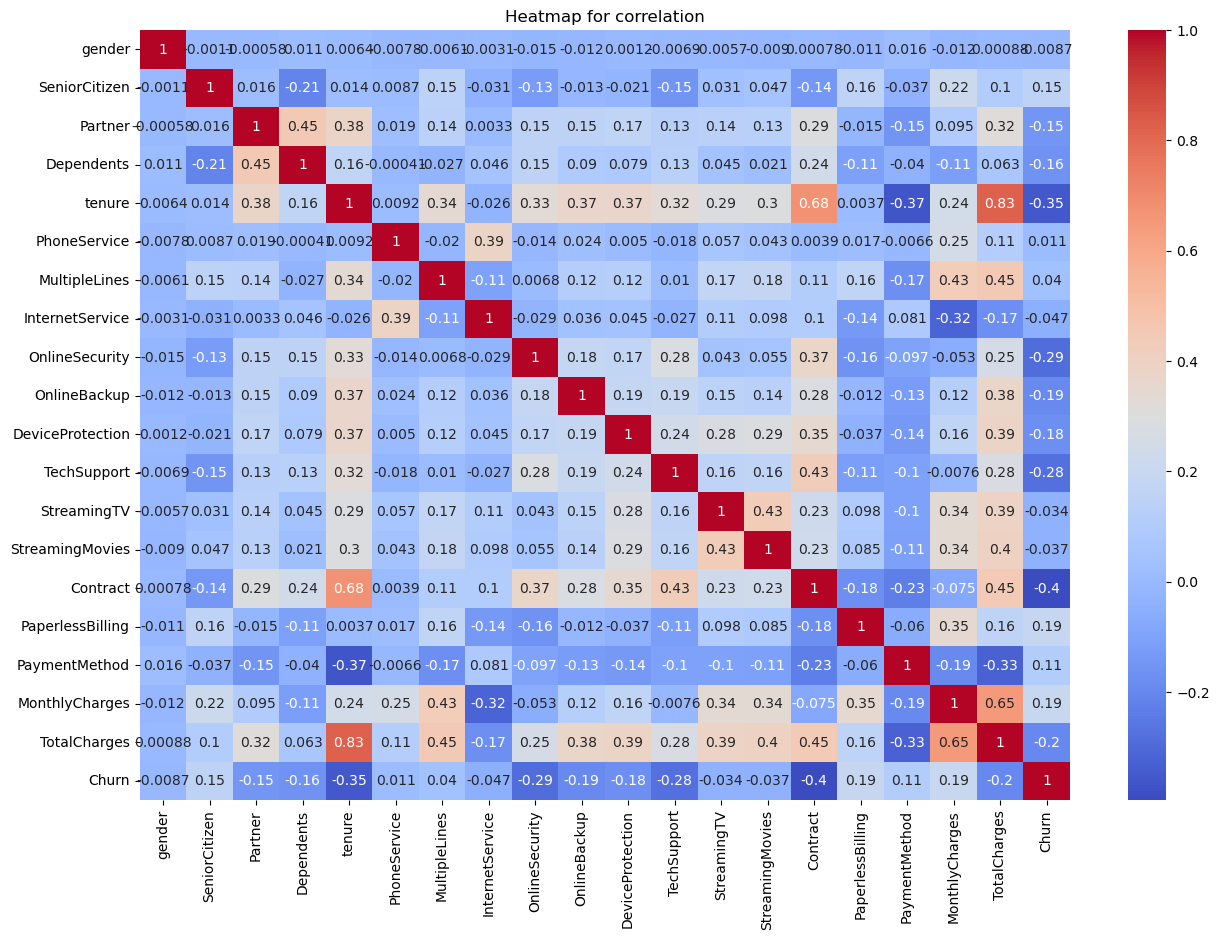

In [20]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap for correlation")
plt.show()

In [21]:
#Monthly charges ,Peparless billing ,Senior citizen ,Payment method, multiple lines these are variable are positively correlated with ChurnTenure ,OnlineSecurity ,Tech support ,Contract these are negatively correlated

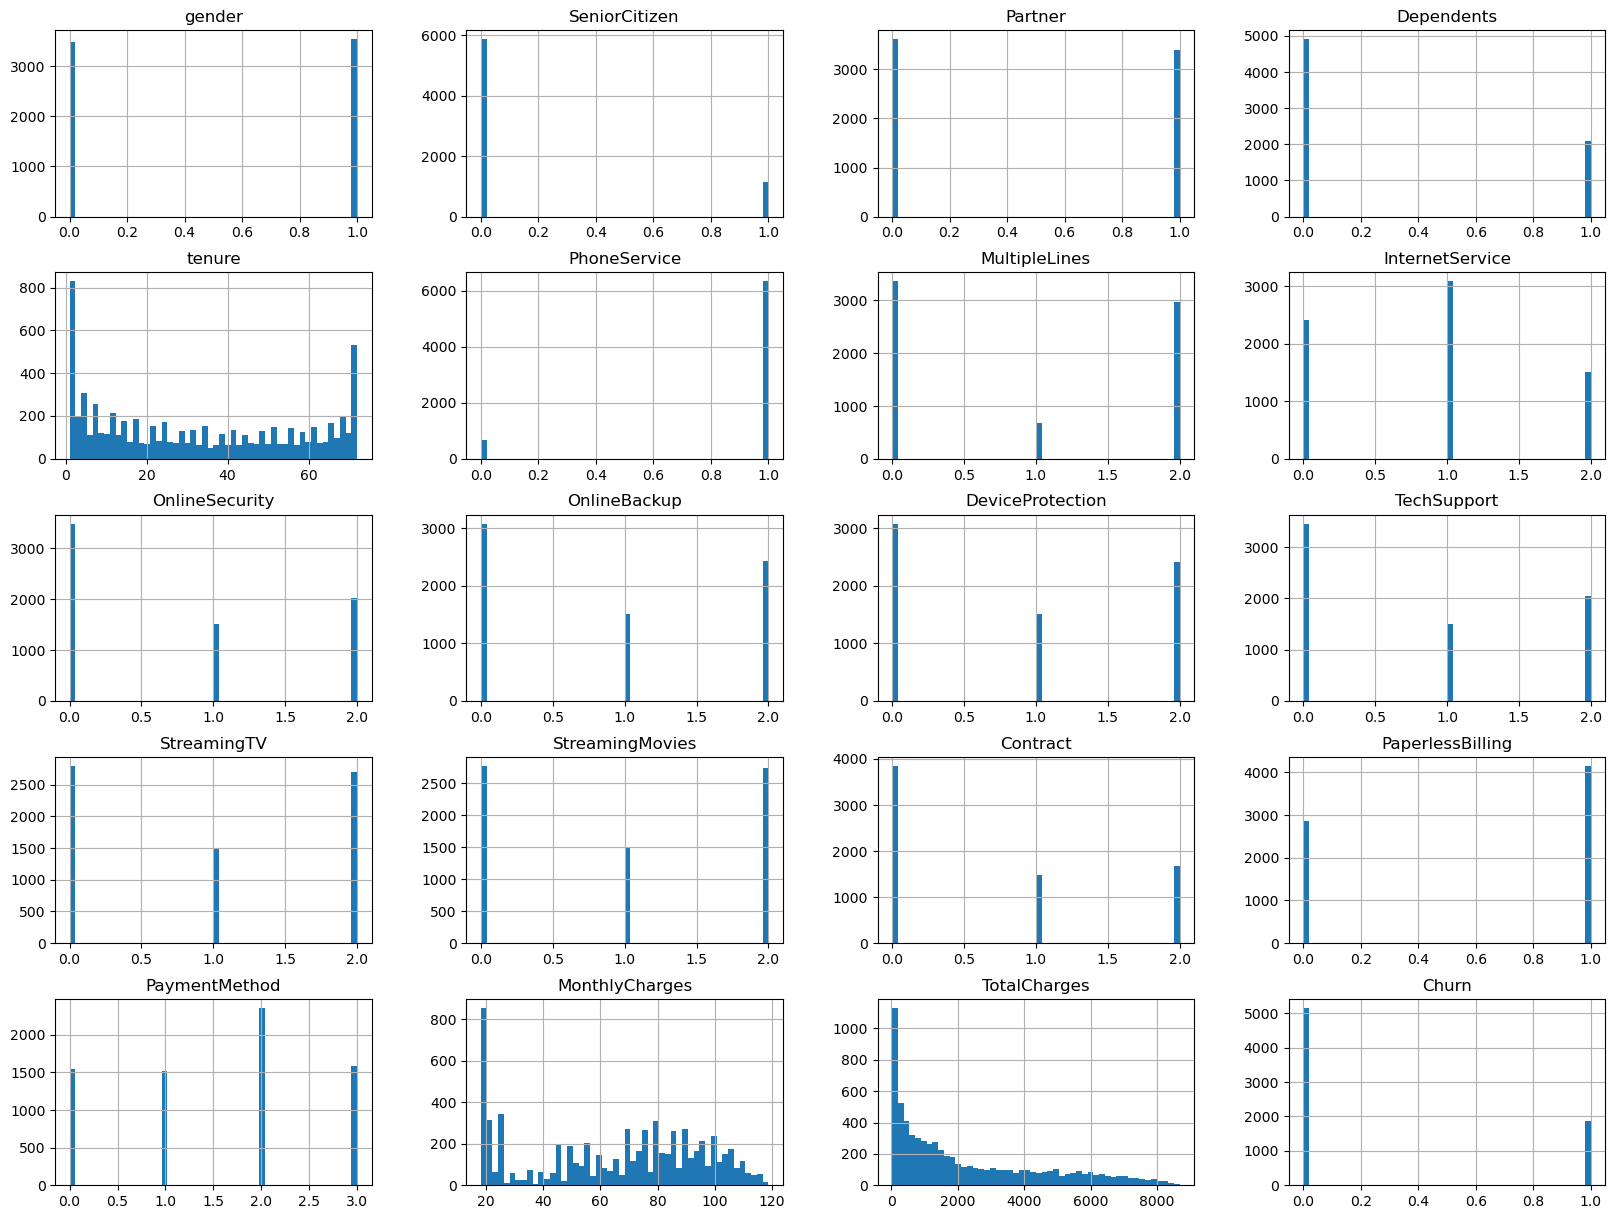

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

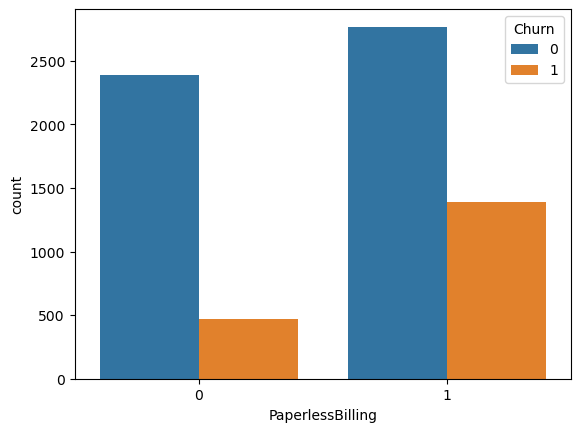

In [23]:
sns.countplot(data=data,x=data['PaperlessBilling'],hue='Churn')

In [24]:
#Customers with peparless billing are more likely to churn than the customers without peparless billing

<AxesSubplot:xlabel='Contract', ylabel='count'>

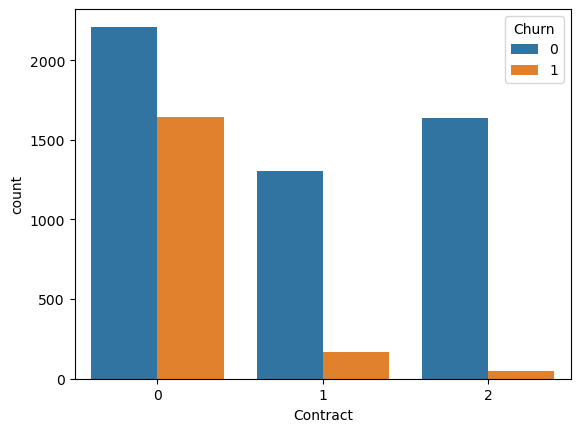

In [25]:
sns.countplot(data=data,x=data['Contract'],hue='Churn')

In [26]:
#Customer with Month-to-month contracts tend to churn more often then Customers with one year and two year contracts.

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

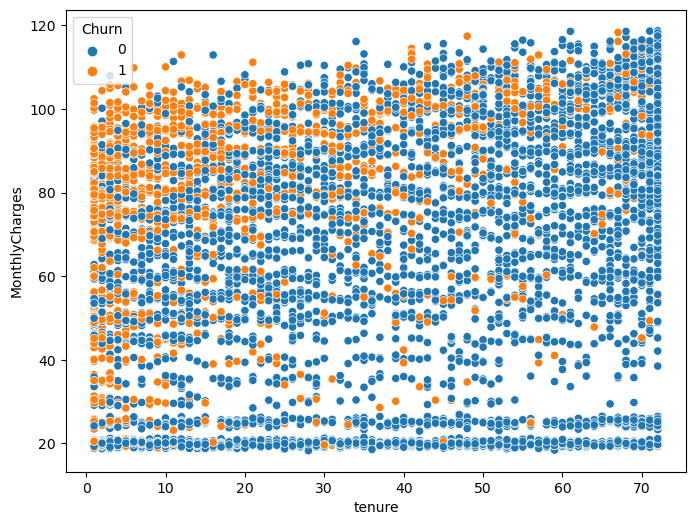

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='Churn',data=data)

In [28]:
#Customers Paying high monthly charges for short tenures are disconnecting.
#Customers paying high monthly charges for long tenures continuing with their plans , as it is reasonable cost.

# Base Model

In [29]:
#Important libraries for model building
import sklearn 
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [30]:
data.shape

(7010, 20)

In [31]:
x=data.iloc[:,0:19]
y=data.iloc[:,-1]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5608, 19), (1402, 19), (5608,), (1402,))

# 1) Logistic Regression

In [34]:
lg=LogisticRegression()

In [35]:
lg.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
lg_p=lg.predict(x_test)

In [37]:
lg_prob=lg.predict_proba(x_test)

In [38]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[918, 191],
       [ 87, 206]], dtype=int64)

In [39]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

80.17118402282453

In [40]:
l_precision=precision_score(lg_p,y_test)
l_score=recall_score(lg_p,y_test)
l_f1=f1_score(lg_p,y_test)

In [41]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1109
           1       0.52      0.70      0.60       293

    accuracy                           0.80      1402
   macro avg       0.72      0.77      0.73      1402
weighted avg       0.83      0.80      0.81      1402



In [42]:
roc=roc_auc_score(lg_p,y_test)
roc

0.7654222203073211

In [43]:
df1=pd.DataFrame(lg_prob)
#df1

In [44]:
fpr,tpr,threshold=roc_curve(y_test,df1.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

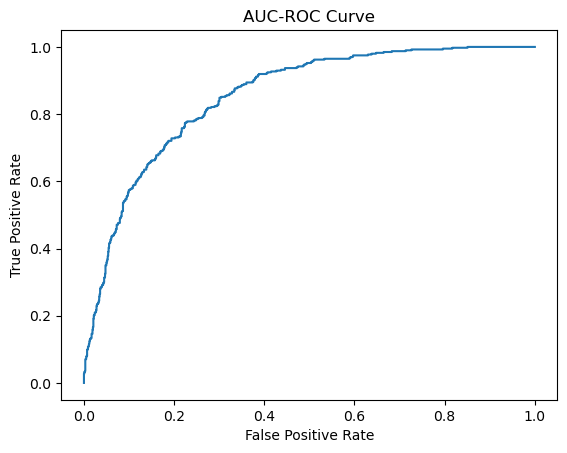

In [45]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")

# 2) Decision Tree

In [46]:
dt=DecisionTreeClassifier()

In [47]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
dt_p=dt.predict(x_test)

In [49]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf


array([[812, 190],
       [193, 207]], dtype=int64)

In [50]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

72.68188302425106

In [51]:
dt_precision=precision_score(dt_p,y_test)
dt_score=recall_score(dt_p,y_test)
dt_f1=f1_score(dt_p,y_test)

In [52]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1002
           1       0.52      0.52      0.52       400

    accuracy                           0.73      1402
   macro avg       0.66      0.66      0.66      1402
weighted avg       0.73      0.73      0.73      1402



# 3)Random Forest

In [53]:
rf=RandomForestClassifier()

In [54]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
rf_p=rf.predict(x_test)
rf_p

array([0, 0, 0, ..., 1, 0, 1])

In [56]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[917, 208],
       [ 88, 189]], dtype=int64)

In [57]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

78.88730385164051

In [58]:
rf_precision=precision_score(rf_p,y_test)
rf_score=recall_score(rf_p,y_test)
rf_f1=f1_score(rf_p,y_test)

In [59]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1125
           1       0.48      0.68      0.56       277

    accuracy                           0.79      1402
   macro avg       0.69      0.75      0.71      1402
weighted avg       0.83      0.79      0.80      1402



# 4)KNN Algorithm


In [60]:
knn = KNeighborsClassifier(n_neighbors=30)

In [61]:
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=30)

In [62]:
k_p=knn.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
ck=confusion_matrix(k_p,y_test)
ck

array([[954, 273],
       [ 51, 124]], dtype=int64)

In [64]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

76.8901569186876

In [65]:
knn_precision=precision_score(k_p,y_test)
knn_score=recall_score(k_p,y_test)
knn_f1=f1_score(k_p,y_test)

In [66]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      1227
           1       0.31      0.71      0.43       175

    accuracy                           0.77      1402
   macro avg       0.63      0.74      0.64      1402
weighted avg       0.87      0.77      0.80      1402



# 5)Support Vector Machine

In [67]:
svc=SVC()

In [68]:
svc.fit(x_train,y_train)

SVC()

In [69]:
s_p=svc.predict(x_test)

In [70]:
cs=confusion_matrix(s_p,y_test)
cs 

array([[1005,  397],
       [   0,    0]], dtype=int64)

In [71]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

71.6833095577746

In [72]:
svm_precision=precision_score(s_p,y_test)
svm_score=recall_score(s_p,y_test)
svm_f1=f1_score(s_p,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1402
           1       0.00      0.00      0.00         0

    accuracy                           0.72      1402
   macro avg       0.50      0.36      0.42      1402
weighted avg       1.00      0.72      0.84      1402



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6)Boosting

In [74]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [75]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [76]:
ad_p=adbo.predict(x_test)
ad_p

array([1, 0, 0, ..., 1, 0, 0])

In [77]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[889, 227],
       [116, 170]], dtype=int64)

In [78]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

75.53495007132668

In [79]:
ad_precision=precision_score(ad_p,y_test)
ad_score=recall_score(ad_p,y_test)
ad_f1=f1_score(ad_p,y_test)

In [80]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1116
           1       0.43      0.59      0.50       286

    accuracy                           0.76      1402
   macro avg       0.66      0.70      0.67      1402
weighted avg       0.79      0.76      0.77      1402



# 7)xgboost

In [81]:
xgb=XGBClassifier()

In [82]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
xgb_p=xgb.predict(x_test)
xgb_p

array([1, 1, 1, ..., 1, 0, 0])

In [84]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[897, 199],
       [108, 198]], dtype=int64)

In [85]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc

78.10271041369472

In [86]:
xgb_precision=precision_score(xgb_p,y_test)
xgb_score=recall_score(xgb_p,y_test)
xgb_f1=f1_score(xgb_p,y_test)

In [87]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1096
           1       0.50      0.65      0.56       306

    accuracy                           0.78      1402
   macro avg       0.70      0.73      0.71      1402
weighted avg       0.81      0.78      0.79      1402



# 8)Naive Bayes

In [88]:
nb=MultinomialNB()

In [89]:
nb.fit(x_train,y_train)

MultinomialNB()

In [90]:
nb_p=nb.predict(x_test)

In [91]:
nc=confusion_matrix(nb_p,y_test)
nc   

array([[642, 118],
       [363, 279]], dtype=int64)

In [92]:
acc_n=nc.diagonal().sum()/nc.sum()*100
acc_n

65.69186875891585

In [93]:
nb_precision=precision_score(nb_p,y_test)
nb_score=recall_score(nb_p,y_test)
nb_f1=f1_score(nb_p,y_test)

In [94]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73       760
           1       0.70      0.43      0.54       642

    accuracy                           0.66      1402
   macro avg       0.67      0.64      0.63      1402
weighted avg       0.67      0.66      0.64      1402



# Conclusion

In [95]:
list1=["LOGISTIC REGRESSSION","DECISION TREE","RANDOM FOREST","ADA-BOOST","XG-BOOST","SVM","KNN","NAIVE BAYES"] 
list2=[lg_acc,dt_acc1,rf_acc,ad_acc,xgb_acc,acc_s,kacc,acc_n]   
list3=[l_precision,dt_precision,rf_precision,ad_precision,xgb_precision,svm_precision,knn_precision,nb_precision]
list4=[l_score,dt_score,rf_score,ad_score,xgb_score,svm_score,knn_score,nb_score]
list5=[l_f1,dt_f1,rf_f1,ad_f1,xgb_f1,svm_f1,knn_f1,nb_f1]

In [96]:
result=pd.DataFrame({"Model Name":list1, "Accuracy":list2,"Precision_score":list3,"Recall_Score":list4,"f1_score":list5})
result

,Model Name,Accuracy,Precision_score,Recall_Score,f1_score
0,LOGISTIC REGRESSSION,80.171184,0.518892,0.703072,0.597101
1,DECISION TREE,72.681883,0.521411,0.517500,0.519448
2,RANDOM FOREST,78.887304,0.476071,0.682310,0.560831
3,ADA-BOOST,75.534950,0.428212,0.594406,0.497804
4,XG-BOOST,78.102710,0.498741,0.647059,0.563300
5,SVM,71.683310,0.000000,0.000000,0.000000
6,KNN,76.890157,0.312343,0.708571,0.433566
7,NAIVE BAYES,65.691869,0.702771,0.434579,0.537055


# Checking Outlier in data

In [97]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

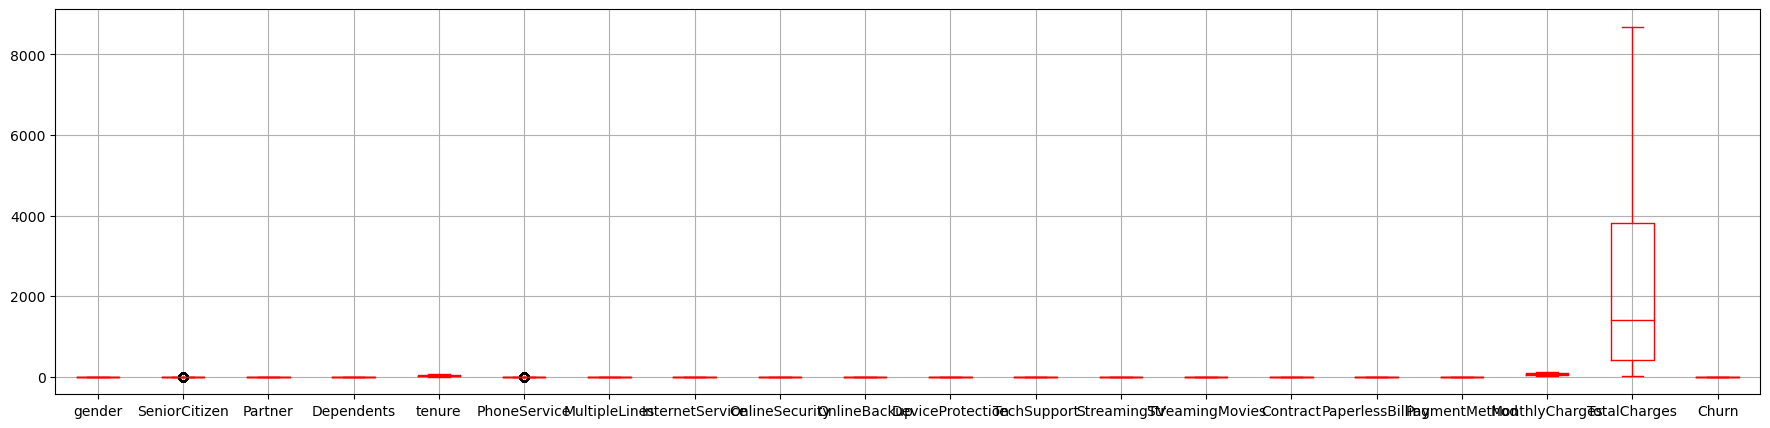

In [98]:
data.boxplot(figsize=(22,5),color='red')

In [99]:
#There is no outlier presend in data

# Checking SKewness of the data

In [100]:
data.skew() # range of skewness is -1 to 1

gender             -0.017123
SeniorCitizen       1.827450
Partner             0.063955
Dependents          0.876026
tenure              0.233740
PhoneService       -2.723862
MultipleLines       0.112710
InternetService     0.208868
OnlineSecurity      0.417818
OnlineBackup        0.182498
DeviceProtection    0.186435
TechSupport         0.403115
StreamingTV         0.027245
StreamingMovies     0.011676
Contract            0.630191
PaperlessBilling   -0.379332
PaymentMethod      -0.165526
MonthlyCharges     -0.225686
TotalCharges        0.958322
Churn               1.065722
dtype: float64

In [101]:
#All numeric variable are in normal  range of skewness that is -1 to 1.

# Class Imbalance Treatment 
using Random Over Sampling

In [102]:
c_0,c_1=data["Churn"].value_counts()
c_0,c_1

(5153, 1857)

In [103]:
data.Churn.value_counts()

0    5153
1    1857
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Customer Churn')

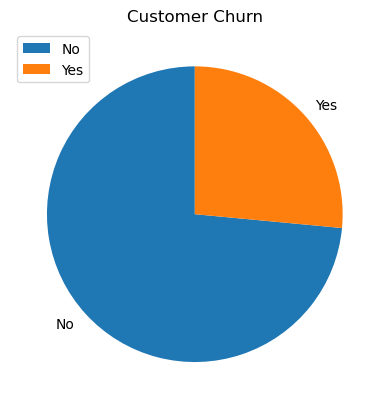

In [104]:
A=data.Churn.value_counts()
x1=["No","Yes"]
plt.pie(A,labels=x1,startangle=90)
plt.legend()
plt.title("Customer Churn")

In [105]:
#Class imbalance problem present in the data

In [106]:
h_0=data[data["Churn"]==0] #0= no 1=yes
h_1=data[data["Churn"]==1]

In [107]:
h_0.shape,h_1.shape

((5153, 20), (1857, 20))

In [108]:
class_1over=h_1.sample(c_0,replace=True)

In [109]:
df=pd.concat([class_1over,h_0],axis=0)

In [110]:
df.Churn.value_counts()

1    5153
0    5153
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Customer Churn')

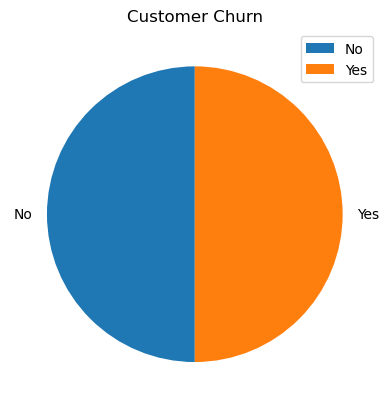

In [111]:
B=df.Churn.value_counts()
x1=["No","Yes"]
plt.pie(B,labels=x1,startangle=90)
plt.legend()
plt.title("Customer Churn")

# Feature selection

In [112]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [113]:
dTree = DecisionTreeClassifier()

In [114]:
dTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [115]:
dTree.feature_importances_

array([0.02690562, 0.02323667, 0.02416009, 0.01766951, 0.12669907,
       0.00108655, 0.01756662, 0.00676577, 0.01877749, 0.01780766,
       0.01534454, 0.02409377, 0.01099397, 0.00825629, 0.16365931,
       0.02403964, 0.03948329, 0.23719201, 0.19626212])

In [116]:
rfe=RFE(dTree)

In [117]:
rfe.fit(df.iloc[:,0:19],df.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [118]:
rfe.support_

array([ True, False, False, False,  True, False, False,  True,  True,
       False,  True, False, False, False,  True, False,  True,  True,
        True])

In [119]:
df3=pd.DataFrame({"Score":list(rfe.support_),"columns":list(df.iloc[:,0:19]),"Importance":list(dTree.feature_importances_)})
df3

,Score,columns,Importance
0,True,gender,0.026906
1,False,SeniorCitizen,0.023237
2,False,Partner,0.024160
3,False,Dependents,0.017670
4,True,tenure,0.126699
5,False,PhoneService,0.001087
6,False,MultipleLines,0.017567
7,True,InternetService,0.006766
8,True,OnlineSecurity,0.018777
9,False,OnlineBackup,0.017808


In [120]:
df=df.drop(["StreamingMovies","StreamingTV","TechSupport","DeviceProtection","InternetService","MultipleLines","PhoneService","Dependents","Partner","SeniorCitizen"],axis=1)

In [121]:
df

,gender,tenure,OnlineSecurity,OnlineBackup,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2280,1,53,2,0,0,0,2,93.90,5029.20,1
2992,1,69,0,2,0,1,2,89.95,6143.15,1
947,1,2,0,0,0,0,3,44.95,85.15,1
5706,1,32,2,2,0,1,1,108.15,3432.90,1
637,1,56,2,0,1,1,0,104.55,5794.65,1
...,...,...,...,...,...,...,...,...,...,...
7026,0,72,1,1,2,1,0,21.15,1419.40,0
7027,1,24,2,0,1,1,3,84.80,1990.50,0
7028,0,72,0,2,1,1,1,103.20,7362.90,0
7029,0,11,2,0,0,1,2,29.60,346.45,0


# Base model after EDA

In [122]:
x1=df.iloc[:,0:9]
y1=df.iloc[:,-1]

In [123]:
x_tr,x_te,y_tr,y_te=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [124]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((8244, 9), (2062, 9), (8244,), (2062,))

# 1)Logistic Regression

In [125]:
lg.fit(x_tr,y_tr)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
lg_p=lg.predict(x_te)
#lg_p

In [127]:
lg_prob=lg.predict_proba(x_te)

In [128]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[741, 211],
       [287, 823]], dtype=int64)

In [129]:
lg_ac=lg_m.diagonal().sum()/lg_m.sum()*100
lg_ac

75.84869059165858

In [130]:
l_precision1=precision_score(lg_p,y_te)
l_score1=recall_score(lg_p,y_te)
l_f11=f1_score(lg_p,y_te)

In [131]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       952
           1       0.80      0.74      0.77      1110

    accuracy                           0.76      2062
   macro avg       0.76      0.76      0.76      2062
weighted avg       0.76      0.76      0.76      2062



# 2)Decision Tree

In [132]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [133]:
dt_p=dt.predict(x_te)

In [134]:
dt_cf=confusion_matrix(dt_p,y_te)
dt_cf


array([[848,  66],
       [180, 968]], dtype=int64)

In [135]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

88.06983511154219

In [136]:
dt_precision1=precision_score(dt_p,y_te)
dt_score1=recall_score(dt_p,y_te)
dt_f11=f1_score(dt_p,y_te)

In [137]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       914
           1       0.94      0.84      0.89      1148

    accuracy                           0.88      2062
   macro avg       0.88      0.89      0.88      2062
weighted avg       0.89      0.88      0.88      2062



# 3)Random Forest

In [138]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [139]:
rf_p=rf.predict(x_te)
#rf_p

In [140]:
rf_cf=confusion_matrix(rf_p,y_te)
rf_cf

array([[885,  53],
       [143, 981]], dtype=int64)

In [141]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

90.49466537342386

In [142]:
rf_precision1=precision_score(rf_p,y_te)
rf_score1=recall_score(rf_p,y_te)
rf_f11=f1_score(rf_p,y_te)

In [143]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       938
           1       0.95      0.87      0.91      1124

    accuracy                           0.90      2062
   macro avg       0.90      0.91      0.90      2062
weighted avg       0.91      0.90      0.91      2062



In [144]:
roc=roc_auc_score(rf_p,y_te)
roc

0.9081363012087504

In [145]:
rf_prob=rf.predict_proba(x_te)

In [146]:
df3=pd.DataFrame(rf_prob)
df3

,0,1
0,0.00,1.00
1,0.49,0.51
2,0.09,0.91
3,0.12,0.88
4,0.01,0.99
...,...,...
2057,0.26,0.74
2058,0.07,0.93
2059,0.98,0.02
2060,0.91,0.09


In [147]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [148]:
precision,recall,threshold=precision_recall_curve(y_te,df3.iloc[:,-1])

Text(0.5, 1.0, 'Precision-Recall Curve')

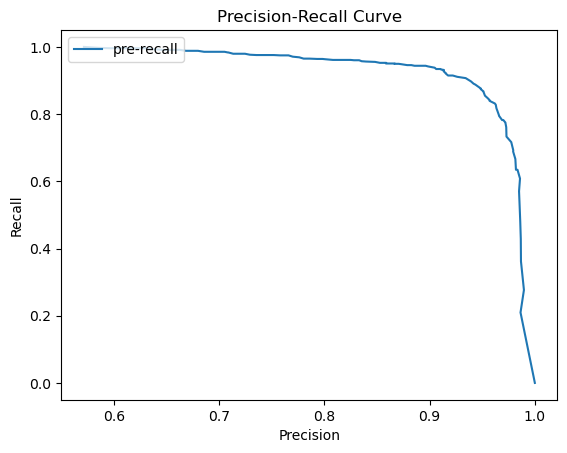

In [149]:
plt.plot(precision,recall,label="pre-recall")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="upper left")
plt.title("Precision-Recall Curve")

# 4) KNN

In [150]:
knn.fit(x_tr,y_tr)


KNeighborsClassifier(n_neighbors=30)

In [151]:
k_p=knn.predict(x_te)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [152]:
ck=confusion_matrix(k_p,y_te)
ck

array([[771, 274],
       [257, 760]], dtype=int64)

In [153]:
kac=ck.diagonal().sum()/ck.sum()*100
kac

74.24830261881668

In [154]:
knn_precision1=precision_score(k_p,y_te)
knn_score1=recall_score(k_p,y_te)
knn_f11=f1_score(k_p,y_te)

In [155]:
print(classification_report(k_p,y_te))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1045
           1       0.74      0.75      0.74      1017

    accuracy                           0.74      2062
   macro avg       0.74      0.74      0.74      2062
weighted avg       0.74      0.74      0.74      2062



# 5)Support Vector Machine

In [156]:
svc.fit(x_tr,y_tr)

SVC()

In [157]:
s_p=svc.predict(x_te)

In [158]:
cs=confusion_matrix(s_p,y_te)
cs 

array([[753, 416],
       [275, 618]], dtype=int64)

In [159]:
ac_s=cs.diagonal().sum()/cs.sum()*100
ac_s

66.48884578079534

In [160]:
svm_precision1=precision_score(s_p,y_te)
svm_score1=recall_score(s_p,y_te)
svm_f11=f1_score(s_p,y_te)

In [161]:
print(classification_report(s_p,y_te))

              precision    recall  f1-score   support

           0       0.73      0.64      0.69      1169
           1       0.60      0.69      0.64       893

    accuracy                           0.66      2062
   macro avg       0.67      0.67      0.66      2062
weighted avg       0.67      0.66      0.67      2062



# 6)Boosting

In [162]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [163]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [164]:
ad_p=adbo.predict(x_te)
#ad_p

In [165]:
ad_cf=confusion_matrix(ad_p,y_te)
ad_cf

array([[886,  66],
       [142, 968]], dtype=int64)

In [166]:
ad_ac=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_ac

89.91270611057226

In [167]:
ad_precision1=precision_score(ad_p,y_te)
ad_score1=recall_score(ad_p,y_te)
ad_f11=f1_score(ad_p,y_te)

In [168]:
print(classification_report(ad_p,y_te))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       952
           1       0.94      0.87      0.90      1110

    accuracy                           0.90      2062
   macro avg       0.90      0.90      0.90      2062
weighted avg       0.90      0.90      0.90      2062



# 7)xgboost

In [169]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [170]:
xgb_p=xgb.predict(x_te)
#xgb_p

In [171]:
xgb_cf=confusion_matrix(xgb_p,y_te)
xgb_cf

array([[831,  94],
       [197, 940]], dtype=int64)

In [172]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

85.88748787584869

In [173]:
xgb_precision1=precision_score(xgb_p,y_te)
xgb_score1=recall_score(xgb_p,y_te)
xgb_f11=f1_score(xgb_p,y_te)

In [174]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       925
           1       0.91      0.83      0.87      1137

    accuracy                           0.86      2062
   macro avg       0.86      0.86      0.86      2062
weighted avg       0.86      0.86      0.86      2062



# 8)Naive Bayes

In [175]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [176]:
nb_p=nb.predict(x_te)

In [177]:
nc=confusion_matrix(nb_p,y_te)
nc 

array([[659, 265],
       [369, 769]], dtype=int64)

In [178]:
ac_n=nc.diagonal().sum()/nc.sum()*100
ac_n

69.25315227934044

In [179]:
nb_precision1=precision_score(nb_p,y_te)
nb_score1=recall_score(nb_p,y_te)
nb_f11=f1_score(nb_p,y_te)

In [180]:
print(classification_report(nb_p,y_te))

              precision    recall  f1-score   support

           0       0.64      0.71      0.68       924
           1       0.74      0.68      0.71      1138

    accuracy                           0.69      2062
   macro avg       0.69      0.69      0.69      2062
weighted avg       0.70      0.69      0.69      2062



# Conclusion

In [181]:
list7=["LOGISTIC REGRESSSION","DECISION TREE","RANDOM FOREST","ADA-BOOST","XG-BOOST","SVM","KNN","NAIVE BAYES"] 
list8=[lg_ac,dt_ac,rf_ac,ad_ac,xgb_ac,ac_s,kac,ac_n]   
list9=[l_precision1,dt_precision1,rf_precision1,ad_precision1,xgb_precision1,svm_precision1,knn_precision1,nb_precision1]
list10=[l_score1,dt_score1,rf_score1,ad_score1,xgb_score1,svm_score1,knn_score1,nb_score1]
list11=[l_f11,dt_f11,rf_f11,ad_f11,xgb_f11,svm_f11,knn_f11,nb_f11]

In [182]:
result2=pd.DataFrame({"Model Name":list7, "Accuracy":list8,"Precision_score":list9,"Recall_Score":list10,"f1_score":list11})
result2

,Model Name,Accuracy,Precision_score,Recall_Score,f1_score
0,LOGISTIC REGRESSSION,75.848691,0.795938,0.741441,0.767724
1,DECISION TREE,88.069835,0.936170,0.843206,0.887259
2,RANDOM FOREST,90.494665,0.948743,0.872776,0.909175
3,ADA-BOOST,89.912706,0.936170,0.872072,0.902985
4,XG-BOOST,85.887488,0.909091,0.826737,0.865960
5,SVM,66.488846,0.597679,0.692049,0.641412
6,KNN,74.248303,0.735010,0.747296,0.741102
7,NAIVE BAYES,69.253152,0.743714,0.675747,0.708103


In [183]:
#we select Random Forest Model

In [184]:
from sklearn.ensemble import RandomForestClassifier
cif=RandomForestClassifier()
cif.fit(x_tr,y_tr)
cif.feature_importances_

array([0.02565219, 0.17448162, 0.06584183, 0.03350498, 0.15383577,
       0.02487645, 0.05412203, 0.23951436, 0.22817077])

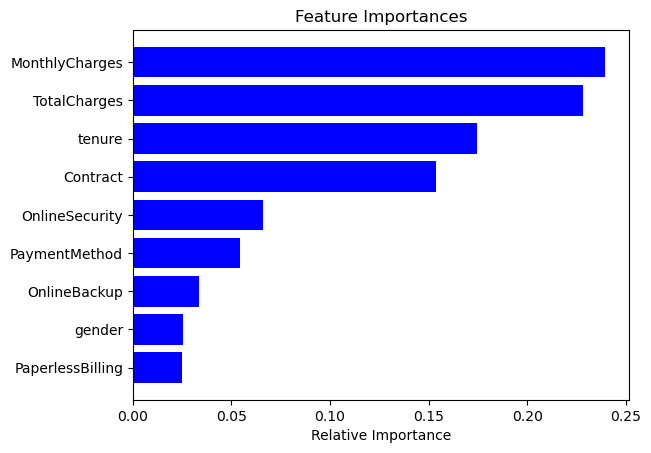

In [185]:
features=df.columns
importances=cif.feature_importances_
indices=np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color="b",align="center")
plt.yticks(range(len(indices)),[features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Conclusion: Monthly Charges , Total Charges , Tenure are more important feature in the data.